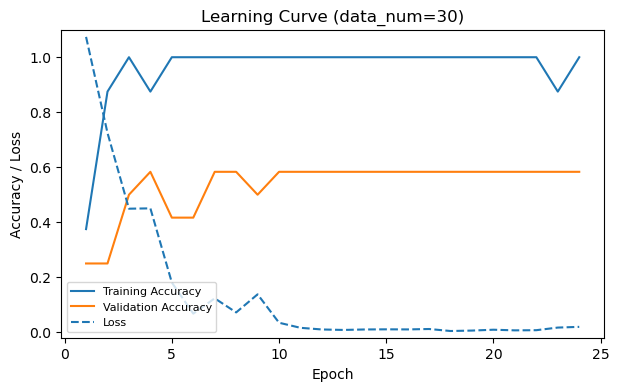

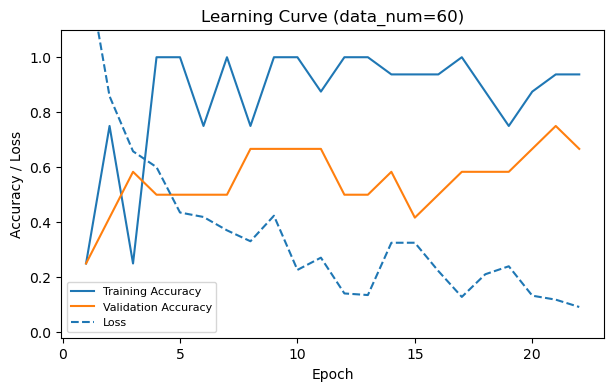

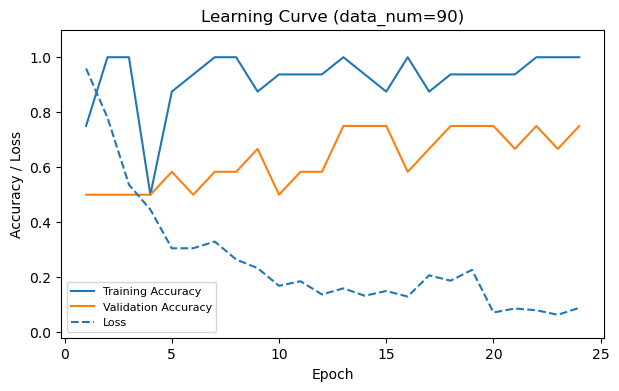

In [32]:
# 学習曲線を使用したバイアスと分散の問題の診断
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('acc.csv')

# 保存データ先
save_dir = './'

# データ数ごとにグラフを分けてプロット
for data_num in [30, 60, 90]:    # データを抽出
    data = df[df['data_num'] == data_num]

    # 新しい図を作成
    plt.figure(figsize=(7, 4))  # Set the figure size to (8, 4)

    # エポック数とaccuracyの折れ線グラフをプロット
    plt.plot(data['epoch'], data['train_acc'], label='Training Accuracy')

    # エポック数とval_accの折れ線グラフをプロット
    plt.plot(data['epoch'], data['val_acc'], label='Validation Accuracy')

    # エポック数とlossの折れ線グラフをプロット
    plt.plot(data['epoch'], data['loss'], linestyle='dashed', color='C0', label='Loss')

    # グラフのタイトルと軸ラベルを設定
    plt.title(f'Learning Curve (data_num={data_num})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')

    # y軸を一定に固定
    plt.ylim([-0.02, 1.1])  # Set the y-axis limits from 0 to 1

    # # 凡例を表示
    plt.legend(prop={'size': 8})  # Set the legend size to 8

    # グラフを保存
    plt.savefig(f'{save_dir}/learning_curve_data_num_{data_num}.png')

    # グラフを表示
    plt.show()


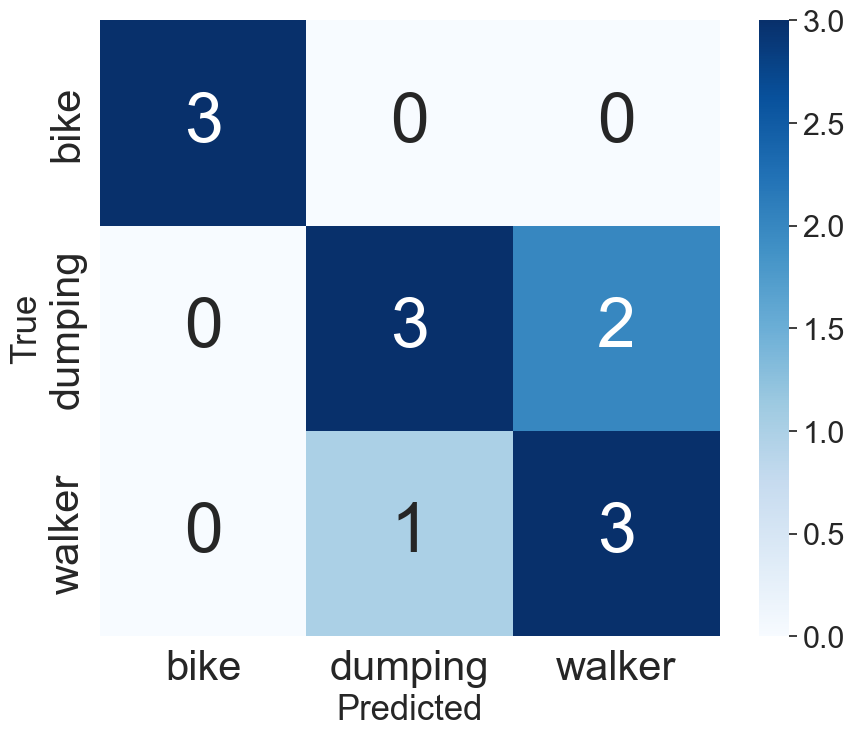

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import matplotlib as mpl

# # 日本語フォントの設定
# # フォントのパスを指定
# font_path = '/path/to/your/font/IPAexfont00301/ipaexg.ttf'
# # フォントのプロパティを設定
# font_prop = mpl.font_manager.FontProperties(fname=font_path)
# # Matplotlibのデフォルトフォントを設定
# mpl.rcParams['font.family'] = font_prop.get_name()


# 保存データ先
save_dir = './'

# 評価結果のjsonファイルを読み込む
pred_path = "./"
pred_result_json_name = "pred.json"
json_file_path = os.path.join(pred_path, pred_result_json_name)

with open(json_file_path, "r") as f:
    test_results_dict = json.load(f)

    # 'pred_label'と'gt_label'の値を抜き出して一つのリストにまとめる
    y_pred = [item['pred_label'][0] for item in test_results_dict]
    y_true = [item['gt_label'][0] for item in test_results_dict]

# 混同行列を作成
cm = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(6, 5))  # Set the figure size to (8, 6)
# 混同行列を表示
sns.set(font_scale=2)  # Increase the font size
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={"size": 50},
            xticklabels=["bike", "dumping", "walker"], yticklabels=["bike", "dumping", "walker"])
plt.xlabel('Predicted', fontsize=25)  # Increase the label font size
plt.ylabel('True', fontsize=25)  # Increase the label font size
plt.xticks(fontsize=30)  # Increase the x-axis font size
plt.yticks(fontsize=30)  # Increase the y-axis font size

# グラフを保存
plt.savefig(f'{save_dir}/confusion_matrix.png')

plt.show()

In [ ]:
import csv
import os

# csv保存先
root_path = "./"
csv_test_name = "acc.csv"

csv_test_path = os.path.join(root_path, csv_test_name)

# csv特徴量
row_list = ["true", "pred"]

if not os.path.exists(csv_test_path):
    with open(csv_test_path, "w") as cf:
        cw = csv.writer(cf)
        cw.writerow(row_list)

In [34]:
import os
import json

# 評価結果のjsonファイルを読み込む
eval_path = "./"
eval_result_name = "pred.json"
json_file_path = os.path.join(
    eval_path, eval_result_name, f"{eval_result_name}.json")
print(json_file_path)

with open(json_file_path, "r") as f:
    test_results_dict = json.load(f)

cm_json = test_results_dict["confusion_matrix/result"]

./pred.json/pred.json.json


In [1]:
# 混同行列

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# cm = confusion_matrix(actual, predicted)

# Plot the confusion matrix.
sns.set(rc={'figure.figsize': (10, 8)})
sns.set(font_scale=1.2)

labels = [r"uchimata_I", r"timeout"]
sns.heatmap(cm_json, annot=True, fmt='g',
            xticklabels=labels, yticklabels=labels, )

label_size = 15
plt.xlabel('Prediction', fontsize=label_size)
plt.ylabel('Actual', fontsize=label_size)
plt.title('Confusion Matrix', fontsize=label_size+3)

plt.savefig(cm_save_path)
plt.show()

NameError: name 'cm_json' is not defined